<font face="serif" size="6" color="scarlet">Natural Language Processing</font>

It is a field in machine learning/deep learning that deals with understanding, analyzing, manipulating and generating language. Humans communicate through language on multiple mediums these days. It gets complicated. There is context, intonation, inflection and body language. The first major advancement in machine language processing was in 1950 when Alan Turing published "Computing Machinery and Intelligence". This paper establsihed the Turing Test, a criterion for how well a computer could impersonate a human. In 1957, Noam Chomsky's paper on Syntactic Structures revolutionized our understanding of linguistics. But a few decades passed without any real progress. It wasn't until the late 80's when ML algorithms were introduced that NLP showed real promise.

 <font face="script" size="4">"Learn a language and you'll avoid a war"-Arab proverb</font>
        

_NLP is not Neuro-linguistic programming(pseuodo-science - think changing behavior through hypnosis). Natural Language Understanding is similar to NLP but a bit different. NLP focuses on turning unstructured data into structured data. NLU is focused on content or sentiment analysis._

<font face="script" size="6" color="scarlet">NLP in the Real World</font>
 
 Lots of everyday things we take for granted rely completely on NLP to function. Spell check and auto-complete, voice recognition/texting, spam filters, search engines, Siri/Alexa, google translate.
 
 - [AI having a convo](https://youtu.be/WnzlbyTZsQY)
 - [Summarize text](https://smmry.com/)
 - [Jennings vs. Watson](https://www.ted.com/talks/ken_jennings_watson_jeopardy_and_me_the_obsolete_know_it_all)

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize 
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/amberyandow/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
df = pd.read_csv('job_scrape6.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 4 columns):
title          537 non-null object
company        520 non-null object
location       520 non-null object
description    537 non-null object
dtypes: object(4)
memory usage: 16.9+ KB


In [3]:
df.head()

,title,company,location,description
0,Data Scientist,Harmonize,"San Francisco, CA",[ Harmonize is a turnkey population health ...
1,Google Cloud - Business Intelligence Data Analyst,SELLBYTEL,"Sunnyvale, CA",[ Google via The SELLBYTEL Group – Sunnyva...
2,Data Scientist,Fanatics Inc.,"San Mateo, CA",[ Company Overview Fanatics is the...
3,"Data Analyst, YouTube Trust and Safety",SELLBYTEL,"San Bruno, CA",[ YouTube's user base is growing and changi...
4,Social Health Data Analyst - Community Health,Kaiser Permanente,"Oakland, CA",[ Have you wondered what it would be like t...


<font face="script" size="6" color="scarlet">Preprocessing, Feature Engineering and EDA</font>
* Casing 
* Punctuation 
* Stop word removal 
* Tokenization 

* Stemming 
* Lemmatization 
* POS tagging 

All of these are ways to help normalize our data, reduce randomness and dimensionality.

→ Removal of duplicate whitespaces and punctuation.<br/>
→ Accent removal (if your data includes diacritical marks from ‘foreign’ languages — this helps to reduce errors related to encoding type).<br/>
→ Capital letter removal (often, working with lowercase words deliver better results. In some cases, however, capital letters are very important to extract information, like names and locations). <br/>
→ Removal or substitution of special characters/emojis (e.g.: remove hashtags). <br/>
→ Substitution of contractions (very common in English; e.g.: ‘I’m’→‘I am’). <br/>
→ Transform word numerals into numbers (eg.: ‘twenty three’→‘23’). <br/>
→ Substitution of values for their type (e.g.: ‘$50’→‘MONEY’). <br/>
→ Acronym normalization (e.g.: ‘US’→‘United States’/‘U.S.A’) and abbreviation normalization (e.g.: ‘btw’→‘by the way’). <br/>
→ Normalize date formats, social security numbers or other data that have a standard format. <br/>
→ Spell correction (one could say that a word can be misspelled infinite ways, so spell corrections reduce the vocabulary variation by “correcting”) — this is very important if you’re dealing with open user inputs, such as tweets, IMs and emails. <br/>
→ Removal of gender/time/grade variation with Stemming or Lemmatization. <br/>
→ Substitution of rare words for more common synonyms. <br/>
→ Stop word removal (more a dimensionality reduction technique than a normalization technique, but let us leave it here for the sake of mentioning it).

In [4]:
#Getting rid of upper cases. This avoids having multiple copies of the same words 
df['lower_desc'] = df['description'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['lower_desc'].head()

0    [ harmonize is a turnkey population health sol...
1    [ google via the sellbytel group – sunnyvale, ...
2    [ company overview fanatics is the global lead...
3    [ youtube's user base is growing and changing,...
4    [ have you wondered what it would be like to w...
Name: lower_desc, dtype: object

<font face="script" size="6" color="scarlet">Regular Expressions</font>

Regular expressions are specially encoded text strings used as patterns for matching sets of strings.
![](regex_cheat_sheet.png)
<a href="https://www.debuggex.com/cheatsheet/regex/python">Regex Cheatsheet</a>

In [5]:
#Removing punctuation. It helps us reduce the size of the data 
df['lower_desc'] = df['lower_desc'].str.replace('[^\w\s]','')
df['lower_desc'].head()

0     harmonize is a turnkey population health solu...
1     google via the sellbytel group  sunnyvale ca ...
2     company overview fanatics is the global leade...
3     youtubes user base is growing and changing wh...
4     have you wondered what it would be like to wa...
Name: lower_desc, dtype: object

<font face="serif" size="4">**Stop Words Removal** - words that don't contribute to the significance or meaning of a document </font>

In [6]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
print(stop)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [7]:
df['char_count'] = df['description'].str.len() #how many characters do we have in description? 
print(df[['description','char_count']].head())
print(df['char_count'].mean())

                                         description  char_count
0  [    Harmonize is a turnkey population health ...        1881
1  [     Google via The SELLBYTEL Group – Sunnyva...        3511
2  [      Company Overview        Fanatics is the...        6063
3  [    YouTube's user base is growing and changi...        2773
4  [    Have you wondered what it would be like t...        4532
3541.0055865921786


In [8]:
#how many stop words do we have? 
df['stopwords'] = df['description'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['description','stopwords']].head(10)

,description,stopwords
0,[ Harmonize is a turnkey population health ...,64
1,[ Google via The SELLBYTEL Group – Sunnyva...,177
2,[ Company Overview Fanatics is the...,241
3,[ YouTube's user base is growing and changi...,129
4,[ Have you wondered what it would be like t...,154
5,[ Job: Engineering Primary Location: Un...,99
6,[ The Position GENERAL POSITION SUMMARY/P...,202
7,[ Description: Provides strategic leader...,121
8,[ -------------- About the Team -----------...,248
9,"[ Reporting directly to the US CRO, the Hea...",102


In [9]:
#removing stopwords 
df['lower_desc'] = df['lower_desc'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['lower_desc'].head()

0    harmonize turnkey population health solution p...
1    google via sellbytel group sunnyvale ca google...
2    company overview fanatics global leader licens...
3    youtubes user base growing changing presents u...
4    wondered would like wake every day contribute ...
Name: lower_desc, dtype: object

In [10]:
#most frequent and least frequent words 
freq = pd.Series(' '.join(df['lower_desc']).split()).value_counts()[:20]
freq

data           5350
experience     2382
business       1414
work           1367
skills         1158
team           1094
analysis        951
years           828
ability         824
analytics       808
science         761
management      687
including       681
knowledge       667
information     654
learning        634
development     632
strong          615
job             590
support         590
dtype: int64

In [11]:
df.head()

,title,company,location,description,lower_desc,char_count,stopwords
0,Data Scientist,Harmonize,"San Francisco, CA",[ Harmonize is a turnkey population health ...,harmonize turnkey population health solution p...,1881,64
1,Google Cloud - Business Intelligence Data Analyst,SELLBYTEL,"Sunnyvale, CA",[ Google via The SELLBYTEL Group – Sunnyva...,google via sellbytel group sunnyvale ca google...,3511,177
2,Data Scientist,Fanatics Inc.,"San Mateo, CA",[ Company Overview Fanatics is the...,company overview fanatics global leader licens...,6063,241
3,"Data Analyst, YouTube Trust and Safety",SELLBYTEL,"San Bruno, CA",[ YouTube's user base is growing and changi...,youtubes user base growing changing presents u...,2773,129
4,Social Health Data Analyst - Community Health,Kaiser Permanente,"Oakland, CA",[ Have you wondered what it would be like t...,wondered would like wake every day contribute ...,4532,154


<font face="script" size="6" color="scarlet">Tokenization</font>

Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

In [12]:
desc_str = ' '.join(df['lower_desc'].tolist())
print(desc_str)

harmonize turnkey population health solution provides remote patient monitoring alert triaging physicians utilize robust data help make efficient decisions provide effective care patient harmonize medical groups outsource population health teams remote patient monitoring without making changes current infrastructure looking data scientist help us discover information hidden vast amounts data help us make smarter decisions deliver even better products primary focus applying data mining techniques statistical analysis building high quality prediction systems integrated product responsibilities selecting features building optimizing classifiers using machine learning techniques enhancing data collection procedures include information relevant building analytic systems processing cleansing verifying integrity data used analysis adhoc analysis presenting results clear manner creating automated anomaly detection systems constant tracking performance requirements excellent understanding machi

In [13]:
tokens = nltk.word_tokenize(desc_str) #tokenizing 
print(len(tokens))

177181


<font face="script" size="6" color="scarlet">Stemming</font>
- a technique to remove affixes from a word and ending up with the stem. Play would be the stem of a word and the 'ing' in playing would be an affix. This process makes similar words more equal to each other. This way the algorithm only has to learn the stem of the word instead of the stem and all its variants.

In [16]:
from nltk.stem import PorterStemmer, WordNetLemmatizer, SnowballStemmer
porter = PorterStemmer() #instantiate
lemma = WordNetLemmatizer() #instantiate 
snow_stemmer = nltk.SnowballStemmer('english')

In [23]:
snow_stemmer.stem('football')

'footbal'

In [24]:
print(porter.stem("football"))

footbal


<font face="script" size="6" color="scarlet">Lemmatization</font>
- similar to stemming but it brings context to the words with morphological(words relationships to other words) analysis. A lemma is the base form of all its inflectional forms. Inflections are added to the stem of a word

In [25]:
print(lemma.lemmatize("football"))

football


<font face="script" size="6" color="scarlet">POS Tagging</font>

In [26]:
tokens_pos = nltk.pos_tag(tokens)
pos_df = pd.DataFrame(tokens_pos, columns = ('word','POS'))
pos_sum = pos_df.groupby('POS', as_index=False).count() # group by POS tags
pos_sum.sort_values(['word'], ascending=[False]) # in descending order of number of words per tag

,POS,word
10,NN,64245
13,NNS,35249
6,JJ,31162
27,VBP,11124
25,VBG,10939
17,RB,4638
24,VBD,3441
26,VBN,3189
2,CD,2832
23,VB,2803


In [27]:
#getting just the nouns
filtered_pos = [ ]
for one in tokens_pos:
    if one[1] == 'NN' or one[1] == 'NNS' or one[1] == 'NNP' or one[1] == 'NNPS':
        filtered_pos.append(one)
print (len(filtered_pos))

99548


In [28]:
#the 100 most common nouns
fdist_pos = nltk.FreqDist(filtered_pos)
top_100_words = fdist_pos.most_common(100)
print(top_100_words)

[(('data', 'NNS'), 5006), (('experience', 'NN'), 1906), (('business', 'NN'), 1414), (('skills', 'NNS'), 1090), (('work', 'NN'), 1052), (('team', 'NN'), 970), (('analysis', 'NN'), 925), (('years', 'NNS'), 828), (('ability', 'NN'), 824), (('analytics', 'NNS'), 802), (('science', 'NN'), 757), (('management', 'NN'), 687), (('information', 'NN'), 654), (('development', 'NN'), 632), (('job', 'NN'), 590), (('solutions', 'NNS'), 574), (('research', 'NN'), 565), (('status', 'NN'), 524), (('opportunity', 'NN'), 496), (('models', 'NNS'), 475), (('knowledge', 'NN'), 475), (('support', 'NN'), 473), (('machine', 'NN'), 467), (('analyst', 'NN'), 464), (('position', 'NN'), 423), (('health', 'NN'), 420), (('tools', 'NNS'), 409), (('reports', 'NNS'), 406), (('requirements', 'NNS'), 387), (('company', 'NN'), 386), (('projects', 'NNS'), 382), (('environment', 'NN'), 371), (('systems', 'NNS'), 370), (('product', 'NN'), 369), (('insights', 'NNS'), 362), (('quality', 'NN'), 357), (('teams', 'NNS'), 346), (('

In [29]:
top_words_df = pd.DataFrame(top_100_words, columns = ('pos','count'))
top_words_df['Word'] = top_words_df['pos'].apply(lambda x: x[0]) # split the tuple of POS
top_words_df = top_words_df.drop('pos', 1) # drop the previous column
top_words_df.head(10)

,count,Word
0,5006,data
1,1906,experience
2,1414,business
3,1090,skills
4,1052,work
5,970,team
6,925,analysis
7,828,years
8,824,ability
9,802,analytics


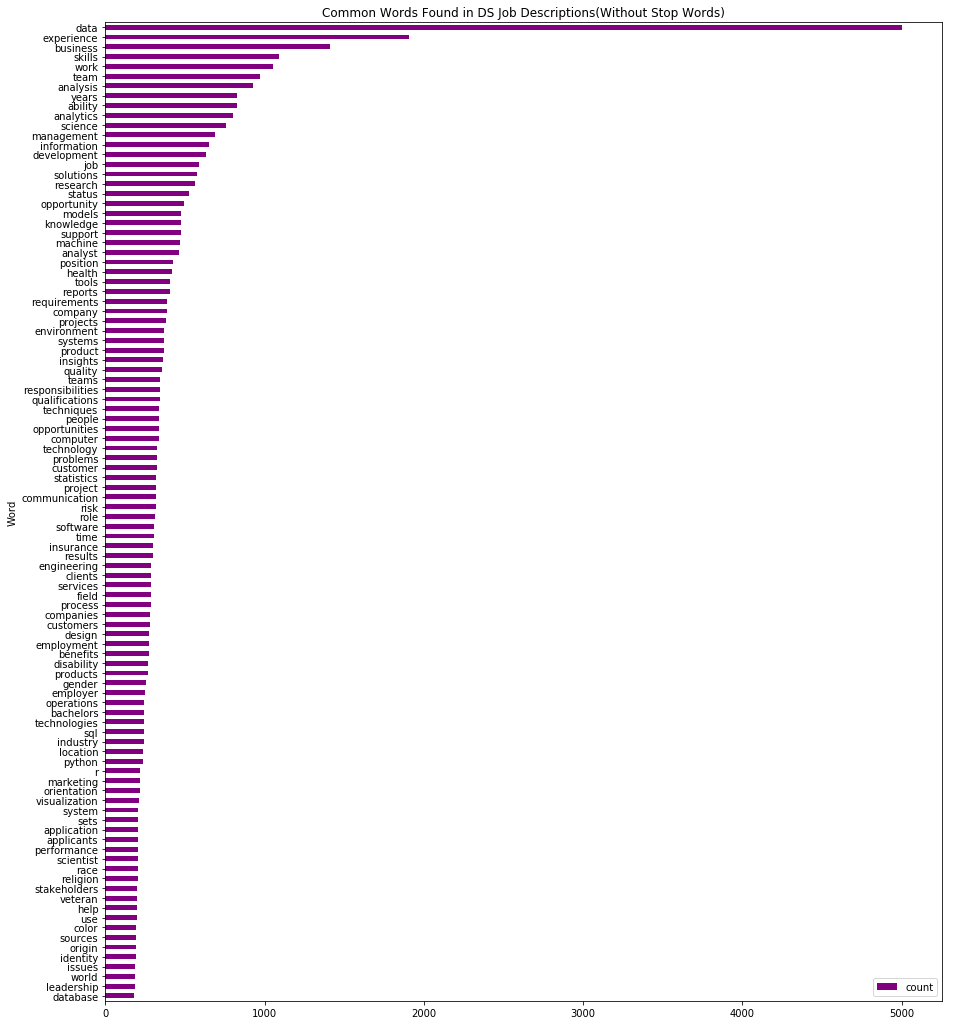

In [30]:
fig, ax = plt.subplots(figsize=(15,18))
top_words_df.sort_values(by='count').plot.barh(x='Word',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in DS Job Descriptions(Without Stop Words)")

plt.show()

In [31]:
from textblob import TextBlob, Word
from wordcloud import WordCloud

In [32]:
word_counts = ' '.join(top_words_df['Word'].tolist())
print(type(word_counts))

<class 'str'>


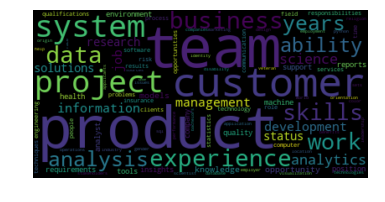

In [33]:
wordcloud = WordCloud().generate(word_counts)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<font face="script" size="6" color="scarlet">Modeling</font>

### Naive Bayes Modeling

Naive Bayes models lend themselves well to NLP problems. Consider the task of trying to predict genre from text. My subjective probability that a text belongs to a certain genre would be a function of the words in the text. So e.g. the (prior) probability that a text is science-fiction may be relatively small. But the probability that a text is science-fiction *given that it uses the word 'cyclotron'* may be quite high.

### TF-IDF 



<center><img src="tfidf.png" height=600 width=600>

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
import string

In [35]:
df['target'] = np.random.randint(0, 2, df.shape[0])
df.head()

,title,company,location,description,lower_desc,char_count,stopwords,target
0,Data Scientist,Harmonize,"San Francisco, CA",[ Harmonize is a turnkey population health ...,harmonize turnkey population health solution p...,1881,64,0
1,Google Cloud - Business Intelligence Data Analyst,SELLBYTEL,"Sunnyvale, CA",[ Google via The SELLBYTEL Group – Sunnyva...,google via sellbytel group sunnyvale ca google...,3511,177,0
2,Data Scientist,Fanatics Inc.,"San Mateo, CA",[ Company Overview Fanatics is the...,company overview fanatics global leader licens...,6063,241,0
3,"Data Analyst, YouTube Trust and Safety",SELLBYTEL,"San Bruno, CA",[ YouTube's user base is growing and changi...,youtubes user base growing changing presents u...,2773,129,0
4,Social Health Data Analyst - Community Health,Kaiser Permanente,"Oakland, CA",[ Have you wondered what it would be like t...,wondered would like wake every day contribute ...,4532,154,0


In [36]:
#setting our target & features 
X = df['lower_desc']
y = df['target'] 

# generate a list of stopwords for TfidfVectorizer to ignore
stopwords_list = stopwords.words('english') + list(string.punctuation)

Let's create a function that takes in our various texts along with their respective labels and uses TF-IDF to vectorize the texts. Recall that TF-IDF helps us "vectorize" text (turn text into numbers) so we can do "math" with it. It is used to reflect how relevant a term is in a given document in a numerical way.

This TF-IDF model rescales the values of important words and makes them comparable between each text in the corpus 

In [37]:
# generate tf-idf vectorization (use sklearn's TfidfVectorizer) for our data
def tfidf(X, y,  stopwords_list): 
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    vectorizer = TfidfVectorizer(stop_words=stopwords_list)
    tf_idf_train = vectorizer.fit_transform(X_train)
    tf_idf_test = vectorizer.transform(X_test)
    return tf_idf_train, tf_idf_test, y_train, y_test, vectorizer

In [38]:
tf_idf_train, tf_idf_test, y_train, y_test, vectorizer = tfidf(X, y, stopwords_list)

Now that we have a set of vectorized training data we can use this data to train a classifier to learn how to classify a specific text based on the vectorized version of the text. The function below will accept a classifier object, a vectorized training set, vectorized test set, and list of training labels and return a list of predictions for our training set and a separate list of predictions for our test set.

In [39]:
nb_classifier = MultinomialNB()
rf_classifier = RandomForestClassifier(n_estimators=100)

In [40]:
# a function that takes in a classifier and trains it on our tf-idf vectors and generates test and train predictiions
def classify_text(classifier, tf_idf_train, tf_idf_test, y_train):
    classifier.fit(tf_idf_train, y_train)
    train_preds = classifier.predict(tf_idf_train)
    test_preds = classifier.predict(tf_idf_test)
    return train_preds, test_preds

In [41]:
# generate predictions with Naive Bayes Classifier
nb_train_preds, nb_test_preds = classify_text(nb_classifier, tf_idf_train, tf_idf_test, y_train)

# evaluate performance of Naive Bayes Classifier
print(confusion_matrix(y_test, nb_test_preds))
print(accuracy_score(y_test, nb_test_preds))

[[56 13]
 [62  4]]
0.4444444444444444


In [42]:
# generate predictions with Random Forest Classifier
rf_train_preds, rf_test_preds = classify_text(rf_classifier, tf_idf_train, tf_idf_test, y_train)

# evaluate performance of Random Forest Classifier
print(confusion_matrix(y_test, rf_test_preds))
print(accuracy_score(y_test, rf_test_preds))

[[45 24]
 [40 26]]
0.5259259259259259


### Inverse Document Frequency (IDF)

$\begin{align}
idf(w) = \log \dfrac{N}{df_t}
\end{align} $

Let's figure out which words are the most important to each class of texts! Recall that Inverse Document Frequency can help us determine which words are most important in an entire corpus or group of documents.



In [43]:
#function that calculates the inverse document frequency(IDF) of each word in our collection
def get_idf(class_, df, stopwords_list):
    docs = df[df.target==class_].lower_desc
    class_dict = {} 
    for doc in docs:
        words = set(doc.split())
        for word in words:
            if word.lower() not in stopwords_list: 
                class_dict[word.lower()] = class_dict.get(word.lower(), 0) + 1
    idf_df = pd.DataFrame.from_dict(class_dict, orient='index')
    idf_df.columns = ['IDF']
    idf_df.IDF = np.log(len(docs)/idf_df.IDF)
    idf_df = idf_df.sort_values(by="IDF", ascending=True)
    return idf_df.head(10)

In [45]:
get_idf(1 , df, stopwords_list)

,IDF
experience,0.048790
data,0.052966
work,0.172843
skills,0.241162
team,0.309073
years,0.347646
strong,0.364643
degree,0.405465
analysis,0.411435
business,0.423484


<font face="script" size="6" color="scarlet">Resources</font>
* [Text blob library](https://textblob.readthedocs.io/en/dev/api_reference.html#textblob.blob.Word)

* [Googles n-gram viewer](https://books.google.com/ngrams/graph?content=API&year_start=1800&year_end=2010&corpus=0&smoothing=3&direct_url=t1%3B%2CAPI%3B%2Cc0)

* [Tweepy - python library for accessing the Twitter API](https://www.tweepy.org/)

* [Step by step guide for NLP](https://blog.insightdatascience.com/how-to-solve-90-of-nlp-problems-a-step-by-step-guide-fda605278e4e)

